## Partie 1: Chargement et Prétraitement des Données

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
# Charger le dataset
df = pd.read_csv(r"C:\Users\pc\Downloads\BIBDA\S3\Intelligence Artificielle 2\TP 2 - Regression Logistique - énoncé\product_purchase\product_purchase.csv")

In [31]:
# Afficher les colonnes du dataset
print("Colonnes du dataset:", df.columns)

Colonnes du dataset: Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')


In [34]:
# Afficher les premières lignes
print("Premières lignes du dataset:")
print(df.head())

Premières lignes du dataset:
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [35]:
# Convertir les colonnes numériques en float et gérer les erreurs de conversion
for column in ['Age', 'EstimatedSalary', 'Purchased']:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Gérer les valeurs manquantes
df.dropna(inplace=True)

# Afficher les premières lignes pour vérifier
print("Premières lignes du dataset après conversion et gestion des valeurs manquantes:")
print(df.head())

Premières lignes du dataset après conversion et gestion des valeurs manquantes:
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [36]:
# Séparer les données en features (X) et étiquettes (y)
X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']

# Afficher un aperçu des features et de l'étiquette
print("Features (X) :")
print(X.head())
print("\nÉtiquette (y) :")
print(y.head())


Features (X) :
   Gender  Age  EstimatedSalary
0    Male   19            19000
1    Male   35            20000
2  Female   26            43000
3  Female   27            57000
4    Male   19            76000

Étiquette (y) :
0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64


## Partie 2: Préparation de l'apprentissage

In [37]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Afficher la taille des ensembles
print("Taille de X_train :", X_train.shape)
print("Taille de X_test :", X_test.shape)
print("Taille de y_train :", y_train.shape)
print("Taille de y_test :", y_test.shape)


Taille de X_train : (320, 3)
Taille de X_test : (80, 3)
Taille de y_train : (320,)
Taille de y_test : (80,)


## Partie 3: Préparation des données pour le modèle

In [38]:
# Créer une instance de StandardScaler
scaler = StandardScaler()

# Normaliser les données d'entraînement (exclure la colonne 'Gender' car elle n'est pas numerique)
X_train_numeric = X_train[['Age', 'EstimatedSalary']]
X_train_scaled = scaler.fit_transform(X_train_numeric)

# Normaliser les données de test (exclure la colonne 'Gender'car elle n'est pas numerique)
X_test_numeric = X_test[['Age', 'EstimatedSalary']]
X_test_scaled = scaler.transform(X_test_numeric)

# Afficher les premières lignes des données normalisées
print("Données d'entraînement normalisées :")
print(X_train_scaled[:5])
print("Données de test normalisées :")
print(X_test_scaled[:5])


Données d'entraînement normalisées :
[[ 1.92295008  2.14601566]
 [ 2.02016082  0.3787193 ]
 [-1.3822153  -0.4324987 ]
 [-1.18779381 -1.01194013]
 [ 1.92295008 -0.92502392]]
Données de test normalisées :
[[-0.79895082  0.49460758]
 [-0.02126485 -0.57735906]
 [-0.31289709  0.14694273]
 [-0.79895082  0.26283101]
 [-0.31289709 -0.57735906]]


## Partie 4: Apprentissage du modèle

In [39]:
# Créer le modèle de régression logistique
model = LogisticRegression(max_iter=1000)

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [41]:
# Afficher les coefficients du modèle
print("Coefficients du modèle :", model.coef_)
print("Intercept du modèle :", model.intercept_)

Coefficients du modèle : [[2.00316198 1.08088613]]
Intercept du modèle : [-0.87076381]


## Partie 5: Évaluation du modèle

In [42]:
# Faire des prédictions sur les données de test
y_pred = model.predict(X_test_scaled)

# Calculer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)

In [43]:
# Afficher la précision
print("Précision du modèle :", accuracy)

Précision du modèle : 0.925


In [44]:
# Afficher le rapport de classification
report = classification_report(y_test, y_pred)
print("Rapport de classification :\n", report)

Rapport de classification :
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        58
           1       0.94      0.77      0.85        22

    accuracy                           0.93        80
   macro avg       0.93      0.88      0.90        80
weighted avg       0.93      0.93      0.92        80



## Partie 6: Visualisation des résultats

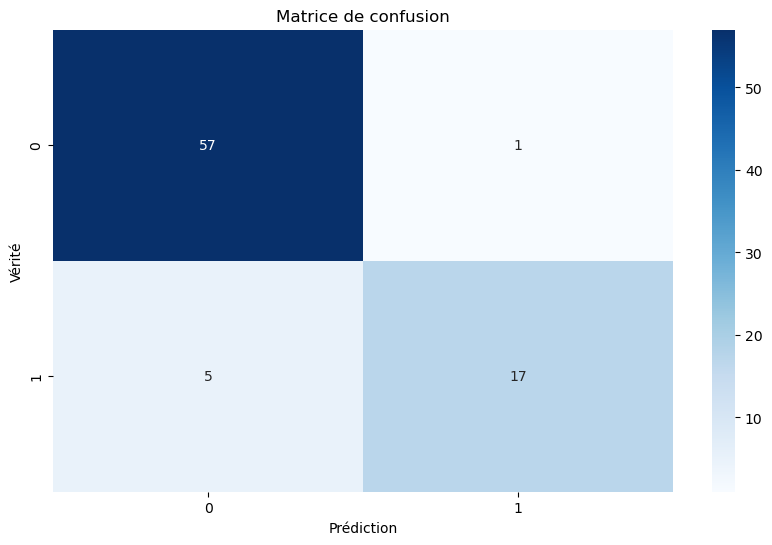

In [27]:
# Créer la matrice de confusion
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Vérité'], colnames=['Prédiction'])

# Tracer la heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.show()